# Goalkeeper Player Analysis

Continue the player analysis by position, this time looking at goalkeepers. I will rank the top 10 goalkeepers by mean (total - bonus pts) with no pre-processing (e.g. remapping points) as it does not make sense in this context: goal keepers do not play out of position.

I will then carry out the usual statistical test and add information on price and average opposition team strength this season.

# Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import *
from statsmodels.stats.multitest import multipletests
from IPython.display import display_html
from IPython.display import HTML
from convert_points import convert_points

# Read and pre-process data

## 2023/24 data

In [2]:
path_2023_24 = '../data/Fantasy-Premier-League/data/2023-24/gws/merged_gw.csv'
data_2023_24 = pd.read_csv(path_2023_24, low_memory = False)
data_2023_24.loc[:,'total - bonus points'] = data_2023_24.total_points - data_2023_24.bonus
GKs_2023_24 = data_2023_24.loc[data_2023_24.position.isin(['GK','GKP']), 'name'].unique()
data_2023_24

,name,position,team,xP,assists,bonus,bps,clean_sheets,creativity,element,...,threat,total_points,transfers_balance,transfers_in,transfers_out,value,was_home,yellow_cards,GW,total - bonus points
0,Femi Seriki,DEF,Sheffield Utd,0.5,0,0,0,0,0.0,653,...,0.0,0,0,0,0,40,True,0,1,0
1,Jack Hinshelwood,MID,Brighton,1.5,0,0,0,0,0.0,621,...,0.0,0,0,0,0,45,True,0,1,0
2,Jadon Sancho,MID,Man Utd,3.0,0,0,4,0,11.3,397,...,8.0,1,0,0,0,70,True,0,1,1
3,Rhys Norrington-Davies,DEF,Sheffield Utd,0.1,0,0,0,0,0.0,487,...,0.0,0,0,0,0,40,True,0,1,0
4,Vitaly Janelt,MID,Brentford,2.1,0,0,6,0,11.5,105,...,17.0,2,0,0,0,55,True,0,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7061,Kyle Walker,DEF,Man City,4.5,0,2,39,1,26.6,369,...,4.0,8,-80597,39634,120231,53,False,0,10,6
7062,Jacob Brown,FWD,Luton,1.0,0,0,-1,0,0.6,631,...,0.0,1,-712,500,1212,49,False,0,10,1
7063,Vicente Guaita,GK,Crystal Palace,0.0,0,0,0,0,0.0,227,...,0.0,0,-2129,0,2129,44,True,0,10,0
7064,Braian Ojeda Rodríguez,MID,Nott'm Forest,0.0,0,0,0,0,0.0,459,...,0.0,0,-11,0,11,45,False,0,10,0


## 2020/21 - 2022/23 data

In [3]:
data_2020_23_path = '../data/Fantasy-Premier-League/data/cleaned_merged_seasons.csv'
seasons_df = pd.read_csv(data_2020_23_path, low_memory = False)
seasons = ['2020-21', '2021-22', '2022-23']
data_2020_23_df = seasons_df.loc[seasons_df.season_x.isin(seasons),:]
data_2020_23_df.position = data_2020_23_df.position.map({'DEF':'DEF','FWD':'FWD','GK':'GK','GKP':'GK','MID':'MID'})
GKs_2020_23_data = data_2020_23_df.loc[data_2020_23_df.name.isin(GKs_2023_24),:]
GKs_2020_23_data.loc[:,'total - bonus points'] = GKs_2020_23_data.total_points - GKs_2020_23_data.bonus
GKs_2020_23_data

C:\Users\Development\AppData\Local\Temp\ipykernel_9728\4294457726.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_2020_23_df.position = data_2020_23_df.position.map({'DEF':'DEF','FWD':'FWD','GK':'GK','GKP':'GK','MID':'MID'})
C:\Users\Development\AppData\Local\Temp\ipykernel_9728\4294457726.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  GKs_2020_23_data.loc[:,'total - bonus points'] = GKs_2020_23_data.total_points - GKs_2020_23_data.bonus


,season_x,name,position,team_x,assists,bonus,bps,clean_sheets,creativity,element,...,threat,total_points,transfers_balance,transfers_in,transfers_out,value,was_home,yellow_cards,GW,total - bonus points
19855,2020-21,Aaron Ramsdale,GK,Sheffield Utd,0,0,12,0,0.0,483,...,0.0,1,0,0,0,50,True,0,1,1
19863,2020-21,Adrián San Miguel del Castillo,GK,Liverpool,0,0,0,0,0.0,245,...,0.0,0,0,0,0,45,True,0,1,0
19875,2020-21,Alisson Ramses Becker,GK,Liverpool,0,0,9,0,0.0,252,...,0.0,1,0,0,0,60,True,0,1,1
19878,2020-21,Alphonse Areola,GK,Fulham,0,0,0,0,0.0,516,...,0.0,0,0,0,0,45,True,0,1,0
19903,2020-21,Bernd Leno,GK,Arsenal,0,1,29,1,0.0,8,...,0.0,7,0,0,0,50,False,0,1,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96035,2022-23,Adrián San Miguel del Castillo,GK,Liverpool,0,0,0,0,0.0,497,...,0.0,0,-371,660,1031,38,False,0,38,0
96149,2022-23,Filip Marschall,GK,Aston Villa,0,0,0,0,0.0,670,...,0.0,0,-5,0,5,40,True,0,38,0
96158,2022-23,Vicente Guaita,GK,Crystal Palace,0,0,0,0,0.0,152,...,0.0,0,1595,4895,3300,44,True,0,38,0
96162,2022-23,Hugo Lloris,GK,Spurs,0,0,0,0,0.0,425,...,0.0,0,-1536,219,1755,54,False,0,38,0


# Analysis

## Which players had the highest mean score from 2020/21 - 2022/23?

In [4]:
top_10_GKs_mean = GKs_2020_23_data.loc[:,['name','total - bonus points']].groupby(['name']).mean()
top_10_GKs_mean.sort_values(by = 'total - bonus points', ascending = False, inplace = True)
top_10_GKs_mean = top_10_GKs_mean.iloc[0:10,:]
top_10_GKs_mean = top_10_GKs_mean.rename(columns={'total - bonus points':'total - bonus pts mean'})
top_10_GKs_mean

,total - bonus pts mean
name,
Alisson Ramses Becker,3.815789
Ederson Santana de Moraes,3.692982
José Malheiro de Sá,3.486842
Nick Pope,3.377193
Aaron Ramsdale,3.238938
Lukasz Fabianski,3.210526
Emiliano Martínez Romero,3.157895
Hugo Lloris,3.157895
David Raya Martin,3.105263


In [5]:
top_10_GKs_names = list(top_10_GKs_mean.index)
top_10_GKs_names

['Alisson Ramses Becker',
 'Ederson Santana de Moraes',
 'José Malheiro de Sá',
 'Nick Pope',
 'Aaron Ramsdale',
 'Lukasz Fabianski',
 'Emiliano Martínez Romero',
 'Hugo Lloris',
 'David Raya Martin',
 'Jordan Pickford']

##  How many matches did these players play?

In [6]:
matches_played = GKs_2020_23_data.loc[:,['name','GW']].groupby('name').size()
matches_played = matches_played.loc[top_10_GKs_names]
matches_played.name = 'GWs played'
top_10_GKs_mean = top_10_GKs_mean.join(matches_played)
top_10_GKs_mean

,total - bonus pts mean,GWs played
name,,
Alisson Ramses Becker,3.815789,114
Ederson Santana de Moraes,3.692982,114
José Malheiro de Sá,3.486842,76
Nick Pope,3.377193,114
Aaron Ramsdale,3.238938,113
Lukasz Fabianski,3.210526,114
Emiliano Martínez Romero,3.157895,38
Hugo Lloris,3.157895,114
David Raya Martin,3.105263,76


## Extract points data for each of these players and generate boxplots:

In [7]:
points_data = []
for name in top_10_GKs_names:
    points_data.append(GKs_2020_23_data.loc[GKs_2020_23_data.name == name,'total - bonus points'].values.astype(float))

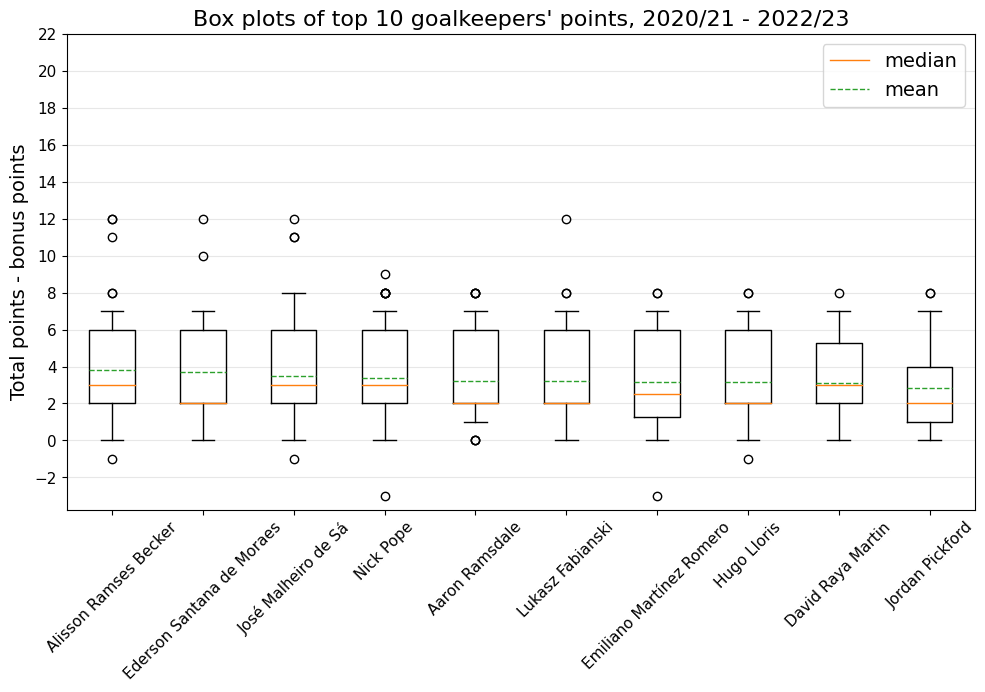

In [8]:
title_font = 18
axis_title_font = 16
legend_font = 14
axis_label_font = 14
axis_tick_font = 11

fig, ax = plt.subplots(nrows = 1, ncols = 1, figsize = (10,7))
box_dict = ax.boxplot(points_data, whis=(5,95), labels = top_10_GKs_names, meanline = True, showmeans = True)
_ = ax.set_xticklabels(ax.get_xticklabels(), fontsize = axis_tick_font, rotation = 45)
_ = ax.set_yticks(np.arange(-2,24,2))
_ = ax.set_yticklabels(ax.get_yticklabels(), fontsize = axis_tick_font)
ax.set_ylabel('Total points - bonus points', fontsize = axis_label_font)
ax.grid(axis = 'y', alpha = 0.3)
ax.legend([box_dict['medians'][0], box_dict['means'][0]], ['median', 'mean'], fontsize = legend_font)
ax.set_title('''Box plots of top 10 goalkeepers' points, 2020/21 - 2022/23''', fontsize = axis_title_font)
fig.tight_layout(pad=1.0)
plt.savefig('./plots/top_10_GKs_boxplots.png', bbox_inches = 'tight')
plt.show()

# What's their performance like this season so far?

## Preprocessing before analysis:

First let's rename and reorder columns, then calculate standard deviation of total - bonus points.

In [9]:
top_10_GKs_mean.rename(columns={'total - bonus pts mean':'mean total - bonus 2020 - 2023',
                                 'GWs played': 'GWs played 2020-2023'}, inplace = True)
top_10_GKs_mean = top_10_GKs_mean[['GWs played 2020-2023', 'mean total - bonus 2020 - 2023']]
# Standard deviation of remapped points:
pts_std = GKs_2020_23_data.loc[:,['name','total - bonus points']].groupby(['name']).std()
pts_std.rename(columns = {'total - bonus points':'Std total - bonus 2020 - 2023'},inplace = True)
top_10_GKs_mean = top_10_GKs_mean.join(pts_std, how='left')
top_10_GKs_mean

,GWs played 2020-2023,mean total - bonus 2020 - 2023,Std total - bonus 2020 - 2023
name,,,
Alisson Ramses Becker,114,3.815789,2.773343
Ederson Santana de Moraes,114,3.692982,2.521157
José Malheiro de Sá,76,3.486842,2.744660
Nick Pope,114,3.377193,2.454508
Aaron Ramsdale,113,3.238938,2.229167
Lukasz Fabianski,114,3.210526,2.436717
Emiliano Martínez Romero,38,3.157895,2.604843
Hugo Lloris,114,3.157895,2.458789
David Raya Martin,76,3.105263,2.414285


## Join 2023/24 season data:

In [10]:
mean_pts_2023_24 = data_2023_24.loc[data_2023_24.name.isin(top_10_GKs_names),['name','total - bonus points']].groupby(['name']).mean()
mean_pts_2023_24.rename(columns={'total - bonus points':'mean total - bonus 2023-24'}, inplace = True)
top_10_GKs_mean = top_10_GKs_mean.join(mean_pts_2023_24, how = 'left')
top_10_GKs_mean

,GWs played 2020-2023,mean total - bonus 2020 - 2023,Std total - bonus 2020 - 2023,mean total - bonus 2023-24
name,,,,
Alisson Ramses Becker,114,3.815789,2.773343,3.7
Ederson Santana de Moraes,114,3.692982,2.521157,3.4
José Malheiro de Sá,76,3.486842,2.744660,2.9
Nick Pope,114,3.377193,2.454508,3.7
Aaron Ramsdale,113,3.238938,2.229167,1.1
Lukasz Fabianski,114,3.210526,2.436717,0.0
Emiliano Martínez Romero,38,3.157895,2.604843,2.3
Hugo Lloris,114,3.157895,2.458789,0.0
David Raya Martin,76,3.105263,2.414285,2.8


## Statistical Test

We want to see if there's a statistically significant difference in the performance of these players this season (so far). That is, we want to say with a 95% confidence that there is an effect present in the data causing the change in performance. We cannot say what this effect is - i.e. is it because these players have played a sequence of easy or hard teams so far? Are they playing out of position? We can only say that an effect exists, and we will factor this into our eventual drafting decisions.

To this end:
* We will calculate the effect size - this shows how large the deviation in performance is this season compared to the last 3 seasons.
* We will carry out a 1-sided t-test for the mean total - bonus points. We consider the 3 previous seasons from 2020/21 - 2022/23 to be our population data: we have all the data from these seasons, not just a sample of a handful of games. We will compare this to our "sample" this season: the GWs that have been played so far. A 1-sided test will be used because we care about the "direction" of the change, i.e. we care not just that it changed, but did it increase or decrease?
* We will then use the Benjamini-Hochberg procedure to limit the False Discovery Rate (FDR) to 5% - as we are carrying out 20 tests, we want to be sure we're not measuring an effect due to sampling chance.

### Effect Size

We will use Cohen's d to measure effect size.

In [11]:
top_10_GKs_mean['Effect size'] = (top_10_GKs_mean['mean total - bonus 2023-24'] - \
                                   top_10_GKs_mean['mean total - bonus 2020 - 2023'])\
                                    /top_10_GKs_mean['Std total - bonus 2020 - 2023']
top_10_GKs_mean

,GWs played 2020-2023,mean total - bonus 2020 - 2023,Std total - bonus 2020 - 2023,mean total - bonus 2023-24,Effect size
name,,,,,
Alisson Ramses Becker,114,3.815789,2.773343,3.7,-0.041751
Ederson Santana de Moraes,114,3.692982,2.521157,3.4,-0.116210
José Malheiro de Sá,76,3.486842,2.744660,2.9,-0.213812
Nick Pope,114,3.377193,2.454508,3.7,0.131516
Aaron Ramsdale,113,3.238938,2.229167,1.1,-0.959524
Lukasz Fabianski,114,3.210526,2.436717,0.0,-1.317563
Emiliano Martínez Romero,38,3.157895,2.604843,2.3,-0.329346
Hugo Lloris,114,3.157895,2.458789,0.0,-1.284329
David Raya Martin,76,3.105263,2.414285,2.8,-0.126440


### 1-sided t-test

$H_0$ $:$ mean points 2023/24 season - mean points 2020/21 - 2022/23 = 0

$H_A$ $:$ mean points 2023/24 season > mean points 2020/21 - 2022/23 **OR** mean points 2023/24 season < mean points 2020/21 - 2022/23
(depending on the change)

In [12]:
top_10_GKs_mean['n'] = data_2023_24['GW'].max() # Sample size
top_10_GKs_mean['SE'] = top_10_GKs_mean['Std total - bonus 2020 - 2023']/np.sqrt(top_10_GKs_mean['n'])
top_10_GKs_mean['t'] = (top_10_GKs_mean['mean total - bonus 2023-24'] - \
                        top_10_GKs_mean['mean total - bonus 2020 - 2023'])/top_10_GKs_mean['SE']
top_10_GKs_mean['p-value'] = t.sf(np.abs(top_10_GKs_mean['t'].values), top_10_GKs_mean['n'].values-1)
top_10_GKs_mean

,GWs played 2020-2023,mean total - bonus 2020 - 2023,Std total - bonus 2020 - 2023,mean total - bonus 2023-24,Effect size,n,SE,t,p-value
name,,,,,,,,,
Alisson Ramses Becker,114,3.815789,2.773343,3.7,-0.041751,10,0.877008,-0.132028,0.448933
Ederson Santana de Moraes,114,3.692982,2.521157,3.4,-0.116210,10,0.797260,-0.367487,0.360875
José Malheiro de Sá,76,3.486842,2.744660,2.9,-0.213812,10,0.867938,-0.676134,0.257976
Nick Pope,114,3.377193,2.454508,3.7,0.131516,10,0.776183,0.415890,0.343616
Aaron Ramsdale,113,3.238938,2.229167,1.1,-0.959524,10,0.704924,-3.034280,0.007074
Lukasz Fabianski,114,3.210526,2.436717,0.0,-1.317563,10,0.770557,-4.166498,0.001212
Emiliano Martínez Romero,38,3.157895,2.604843,2.3,-0.329346,10,0.823724,-1.041484,0.162410
Hugo Lloris,114,3.157895,2.458789,0.0,-1.284329,10,0.777537,-4.061405,0.001418
David Raya Martin,76,3.105263,2.414285,2.8,-0.126440,10,0.763464,-0.399840,0.349299


### Benjamini-Hochberg Procedure

Control the false discovery rate (FDR) to 5%. We will not record the new p-values - just whether the null hypothesis is rejected or not i.e. whether the result is statistically significant.

In [13]:
top_10_GKs_mean['BH Statistically Significant'], _, _, _ = multipletests(top_10_GKs_mean['p-value'].values, 
                                                                alpha=0.05, 
                                                                method='fdr_bh',
                                                                is_sorted=False, 
                                                                returnsorted=False)
top_10_GKs_mean

,GWs played 2020-2023,mean total - bonus 2020 - 2023,Std total - bonus 2020 - 2023,mean total - bonus 2023-24,Effect size,n,SE,t,p-value,BH Statistically Significant
name,,,,,,,,,,
Alisson Ramses Becker,114,3.815789,2.773343,3.7,-0.041751,10,0.877008,-0.132028,0.448933,False
Ederson Santana de Moraes,114,3.692982,2.521157,3.4,-0.116210,10,0.797260,-0.367487,0.360875,False
José Malheiro de Sá,76,3.486842,2.744660,2.9,-0.213812,10,0.867938,-0.676134,0.257976,False
Nick Pope,114,3.377193,2.454508,3.7,0.131516,10,0.776183,0.415890,0.343616,False
Aaron Ramsdale,113,3.238938,2.229167,1.1,-0.959524,10,0.704924,-3.034280,0.007074,True
Lukasz Fabianski,114,3.210526,2.436717,0.0,-1.317563,10,0.770557,-4.166498,0.001212,True
Emiliano Martínez Romero,38,3.157895,2.604843,2.3,-0.329346,10,0.823724,-1.041484,0.162410,False
Hugo Lloris,114,3.157895,2.458789,0.0,-1.284329,10,0.777537,-4.061405,0.001418,True
David Raya Martin,76,3.105263,2.414285,2.8,-0.126440,10,0.763464,-0.399840,0.349299,False


### Effect Size Label:

In [14]:
top_10_GKs_mean['Effect size label'] = np.digitize(np.abs(top_10_GKs_mean['Effect size']), [0.01,0.2,0.5,0.8,1.20,2.0],
                                                   right = True)
top_10_GKs_mean['Effect size label'] = top_10_GKs_mean['Effect size label'].map({0:'None',1:'Very small',2:'Small',
                                                                                   3:'Medium',4:'Large',5:'Very large',
                                                                                   6:'Huge'})
top_10_GKs_mean

,GWs played 2020-2023,mean total - bonus 2020 - 2023,Std total - bonus 2020 - 2023,mean total - bonus 2023-24,Effect size,n,SE,t,p-value,BH Statistically Significant,Effect size label
name,,,,,,,,,,,
Alisson Ramses Becker,114,3.815789,2.773343,3.7,-0.041751,10,0.877008,-0.132028,0.448933,False,Very small
Ederson Santana de Moraes,114,3.692982,2.521157,3.4,-0.116210,10,0.797260,-0.367487,0.360875,False,Very small
José Malheiro de Sá,76,3.486842,2.744660,2.9,-0.213812,10,0.867938,-0.676134,0.257976,False,Small
Nick Pope,114,3.377193,2.454508,3.7,0.131516,10,0.776183,0.415890,0.343616,False,Very small
Aaron Ramsdale,113,3.238938,2.229167,1.1,-0.959524,10,0.704924,-3.034280,0.007074,True,Large
Lukasz Fabianski,114,3.210526,2.436717,0.0,-1.317563,10,0.770557,-4.166498,0.001212,True,Very large
Emiliano Martínez Romero,38,3.157895,2.604843,2.3,-0.329346,10,0.823724,-1.041484,0.162410,False,Small
Hugo Lloris,114,3.157895,2.458789,0.0,-1.284329,10,0.777537,-4.061405,0.001418,True,Very large
David Raya Martin,76,3.105263,2.414285,2.8,-0.126440,10,0.763464,-0.399840,0.349299,False,Very small


### Statistical Test Conclusion

We fail to reject the null hypothesis $H_0$ for all 10 players after applying the Benjamini Hochberg procedure, meaning the performance deviation of these players is not statistically significant. It may be the case for some players that their performance actually hasn't changed at all, whereas for others, it may be due to chance in the sample of games they've played so far.

# Additional Stats for 2023/24 season

Price, and average rank of opponent teams so far are important metrics to analyse when drafting players.

## Add price column

In [15]:
latest_GW = data_2023_24.GW.max()
current_price_df = data_2023_24.loc[(data_2023_24.GW == latest_GW) & (data_2023_24.name.isin(top_10_GKs_names)), 
                                    ['name','value']]
current_price_df.set_index('name',inplace=True)
current_price_df.value /= 10 # get price in millions
current_price_df.rename(columns={'value':'Current Price (M)'}, inplace=True)
top_10_GKs_mean = top_10_GKs_mean.join(current_price_df, how='left')
top_10_GKs_mean

,GWs played 2020-2023,mean total - bonus 2020 - 2023,Std total - bonus 2020 - 2023,mean total - bonus 2023-24,Effect size,n,SE,t,p-value,BH Statistically Significant,Effect size label,Current Price (M)
name,,,,,,,,,,,,
Alisson Ramses Becker,114,3.815789,2.773343,3.7,-0.041751,10,0.877008,-0.132028,0.448933,False,Very small,5.5
Ederson Santana de Moraes,114,3.692982,2.521157,3.4,-0.116210,10,0.797260,-0.367487,0.360875,False,Very small,5.5
José Malheiro de Sá,76,3.486842,2.744660,2.9,-0.213812,10,0.867938,-0.676134,0.257976,False,Small,5.0
Nick Pope,114,3.377193,2.454508,3.7,0.131516,10,0.776183,0.415890,0.343616,False,Very small,5.5
Aaron Ramsdale,113,3.238938,2.229167,1.1,-0.959524,10,0.704924,-3.034280,0.007074,True,Large,4.8
Lukasz Fabianski,114,3.210526,2.436717,0.0,-1.317563,10,0.770557,-4.166498,0.001212,True,Very large,4.3
Emiliano Martínez Romero,38,3.157895,2.604843,2.3,-0.329346,10,0.823724,-1.041484,0.162410,False,Small,4.9
Hugo Lloris,114,3.157895,2.458789,0.0,-1.284329,10,0.777537,-4.061405,0.001418,True,Very large,4.8
David Raya Martin,76,3.105263,2.414285,2.8,-0.126440,10,0.763464,-0.399840,0.349299,False,Very small,4.8


## Add mean opposition strength column

In [16]:
team_data_path = '../data/Fantasy-Premier-League/data/2023-24/teams.csv'
team_data = pd.read_csv(team_data_path)
team_id_rank_map = dict(zip(team_data.id, team_data.strength)) # Create map between team id and strength

In [17]:
avg_team_rank = data_2023_24.loc[data_2023_24.name.isin(top_10_GKs_names), ['name','opponent_team']]
avg_team_rank.opponent_team = avg_team_rank.opponent_team.map(team_id_rank_map)
avg_team_rank = avg_team_rank.groupby('name').mean()
avg_team_rank.rename(columns = {'opponent_team': 'Average opposition strength 2023/24'}, inplace=True)
top_10_GKs_mean = top_10_GKs_mean.join(avg_team_rank, how='left')
top_10_GKs_mean.rename(columns = {'n': 'GWs played 2023-24'}, inplace=True)
top_10_GKs_mean = top_10_GKs_mean[['GWs played 2020-2023','mean total - bonus 2020 - 2023',
                                     'Std total - bonus 2020 - 2023',
                                     'GWs played 2023-24','mean total - bonus 2023-24',
                                     'Effect size',
                                     'SE','t','p-value','BH Statistically Significant',
                                     'Effect size label','Current Price (M)','Average opposition strength 2023/24']]
top_10_GKs_mean

,GWs played 2020-2023,mean total - bonus 2020 - 2023,Std total - bonus 2020 - 2023,GWs played 2023-24,mean total - bonus 2023-24,Effect size,SE,t,p-value,BH Statistically Significant,Effect size label,Current Price (M),Average opposition strength 2023/24
name,,,,,,,,,,,,,
Alisson Ramses Becker,114,3.815789,2.773343,10,3.7,-0.041751,0.877008,-0.132028,0.448933,False,Very small,5.5,3.1
Ederson Santana de Moraes,114,3.692982,2.521157,10,3.4,-0.116210,0.797260,-0.367487,0.360875,False,Very small,5.5,3.1
José Malheiro de Sá,76,3.486842,2.744660,10,2.9,-0.213812,0.867938,-0.676134,0.257976,False,Small,5.0,3.4
Nick Pope,114,3.377193,2.454508,10,3.7,0.131516,0.776183,0.415890,0.343616,False,Very small,5.5,3.1
Aaron Ramsdale,113,3.238938,2.229167,10,1.1,-0.959524,0.704924,-3.034280,0.007074,True,Large,4.8,3.2
Lukasz Fabianski,114,3.210526,2.436717,10,0.0,-1.317563,0.770557,-4.166498,0.001212,True,Very large,4.3,3.2
Emiliano Martínez Romero,38,3.157895,2.604843,10,2.3,-0.329346,0.823724,-1.041484,0.162410,False,Small,4.9,3.0
Hugo Lloris,114,3.157895,2.458789,10,0.0,-1.284329,0.777537,-4.061405,0.001418,True,Very large,4.8,3.0
David Raya Martin,76,3.105263,2.414285,10,2.8,-0.126440,0.763464,-0.399840,0.349299,False,Very small,4.8,3.2


# Style table

In [18]:
def points_change(x):
    c1 = '''color:white;background-color: forestgreen '''
    c2 = '''color:white;background-color: crimson '''
    #compare columns
    mask = x['Effect size'] > 0
    mask2 = x['Effect size'] < 0
    #DataFrame with same index and columns names as original filled empty strings
    df1 =  pd.DataFrame('', index=x.index, columns=x.columns)
    #modify values of df1 column by boolean mask
    df1.loc[mask, 'mean total - bonus 2023-24'] = c1
    df1.loc[mask2, 'mean total - bonus 2023-24'] = c2
    
    return df1

def effect_size_colour(x):
    a = sns.color_palette('BuGn',7).as_hex()
    
    none = f'''color:black;background-color: {a[0]} '''
    vsmall = f'''color:white;background-color: {a[1]} '''
    small = f'''color:white;background-color: {a[2]} '''
    med = f'''color:white;background-color: {a[3]} '''
    large = f'''color:white;background-color: {a[4]} '''
    vlarge = f'''color:white;background-color: {a[5]} '''
    huge = f'''color:white;background-color: {a[6]} '''
    #compare columns
    mask = x['Effect size label'] == 'None'
    mask2= x['Effect size label'] == 'Very small'
    mask3= x['Effect size label'] == 'Small'
    mask4= x['Effect size label'] == 'Medium'
    mask5= x['Effect size label'] == 'Large'
    mask6= x['Effect size label'] == 'Very large'
    mask7= x['Effect size label'] == 'Huge'
    #DataFrame with same index and columns names as original filled empty strings
    df1 =  pd.DataFrame('', index=x.index, columns=x.columns)
    #modify values of df1 column by boolean mask
    df1.loc[mask, 'Effect size label'] = none
    df1.loc[mask2, 'Effect size label'] = vsmall
    df1.loc[mask3, 'Effect size label'] = small
    df1.loc[mask4, 'Effect size label'] = med
    df1.loc[mask5, 'Effect size label'] = large
    df1.loc[mask6, 'Effect size label'] = vlarge
    df1.loc[mask7, 'Effect size label'] = huge
    
    return df1

In [19]:
highlight_slice = ['mean total - bonus 2020 - 2023','Current Price (M)']
top_10_GKs_mean.style.set_properties(**{'color':'black','background-color': '#ffffb3'}, subset=highlight_slice)\
.background_gradient(cmap=sns.diverging_palette(145, 10, as_cmap=True), subset=['Average opposition strength 2023/24'])\
.applymap(lambda x: f'''color:white;background-color: {'forestgreen' if x else 'crimson'}''',subset=['BH Statistically Significant'])\
.apply(points_change, axis=None)\
.apply(effect_size_colour, axis=None)

C:\Users\Development\AppData\Local\Temp\ipykernel_9728\4106941031.py:4: FutureWarning: Styler.applymap has been deprecated. Use Styler.map instead.
  .applymap(lambda x: f'''color:white;background-color: {'forestgreen' if x else 'crimson'}''',subset=['BH Statistically Significant'])\


,GWs played 2020-2023,mean total - bonus 2020 - 2023,Std total - bonus 2020 - 2023,GWs played 2023-24,mean total - bonus 2023-24,Effect size,SE,t,p-value,BH Statistically Significant,Effect size label,Current Price (M),Average opposition strength 2023/24
name,,,,,,,,,,,,,
Alisson Ramses Becker,114,3.815789,2.773343,10,3.700000,-0.041751,0.877008,-0.132028,0.448933,False,Very small,5.500000,3.100000
Ederson Santana de Moraes,114,3.692982,2.521157,10,3.400000,-0.116210,0.797260,-0.367487,0.360875,False,Very small,5.500000,3.100000
José Malheiro de Sá,76,3.486842,2.744660,10,2.900000,-0.213812,0.867938,-0.676134,0.257976,False,Small,5.000000,3.400000
Nick Pope,114,3.377193,2.454508,10,3.700000,0.131516,0.776183,0.415890,0.343616,False,Very small,5.500000,3.100000
Aaron Ramsdale,113,3.238938,2.229167,10,1.100000,-0.959524,0.704924,-3.034280,0.007074,True,Large,4.800000,3.200000
Lukasz Fabianski,114,3.210526,2.436717,10,0.000000,-1.317563,0.770557,-4.166498,0.001212,True,Very large,4.300000,3.200000
Emiliano Martínez Romero,38,3.157895,2.604843,10,2.300000,-0.329346,0.823724,-1.041484,0.162410,False,Small,4.900000,3.000000
Hugo Lloris,114,3.157895,2.458789,10,0.000000,-1.284329,0.777537,-4.061405,0.001418,True,Very large,4.800000,3.000000
David Raya Martin,76,3.105263,2.414285,10,2.800000,-0.126440,0.763464,-0.399840,0.349299,False,Very small,4.800000,3.200000


In [20]:
highlight_slice = ['mean total - bonus 2020 - 2023','Current Price (M)']
top_10_GKs_mean.style.set_properties(**{'color':'black','background-color': '#ffffb3'}, subset=highlight_slice)\
.background_gradient(cmap=sns.diverging_palette(145, 10, as_cmap=True), subset=['Average opposition strength 2023/24'])\
.applymap(lambda x: f'''color:white;background-color: {'forestgreen' if x else 'crimson'}''',subset=['BH Statistically Significant'])\
.apply(points_change, axis=None)\
.apply(effect_size_colour, axis=None).to_excel('./results/Goalkeeper_analysis.xlsx', engine='openpyxl')

C:\Users\Development\AppData\Local\Temp\ipykernel_9728\3723088806.py:4: FutureWarning: Styler.applymap has been deprecated. Use Styler.map instead.
  .applymap(lambda x: f'''color:white;background-color: {'forestgreen' if x else 'crimson'}''',subset=['BH Statistically Significant'])\


# Summary and Conclusion

I analysed the top 10 GKs from the past 3 seasons, and compared their performance so far this season (2023/24). I calculated the effect size, to measure how big the deviation is, and then carried out a 1 sided t-test to determine if the deviation is statistically significant. After applying the Benjamini Hochberg procedure to control the FDR to 5%, I found that the differences were not statistically significant for any player.

Finally, I added some information on the current price of the players and their average opposition rank this season (which may help explain performance deviations), before styling the results table and exporting to Excel.

I intend to use these results, as well as the results for the other positions to compile my team after playing the wild card chip.